In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 
import itertools
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_validate
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from wordcloud import WordCloud


In [173]:
dataset = pd.read_csv('/Users/heli/Desktop/Hoboken_restaurants_reviews.csv')

In [174]:
dataset = dataset.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1)

In [175]:
dataset

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5.0 star rating,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4.0 star rating,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5.0 star rating,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4.0 star rating,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5.0 star rating,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
5,a5KJFFLBMoEpU7Bogn8YdQ,Nicole C.,4.0 star rating,beautifully decorated wine bar with delicious ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
6,VG-EfMnPKHKHhEQZIWv1zQ,Kelly V.,3.0 star rating,"We were there today, for brunch. Very disappoi...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
7,y_LETSyVwMVKbMSHwHDioQ,Erin A.,3.0 star rating,"I am feeling more 3 and 1/2 stars here, so let...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
8,zbvdkxh9OWQtk8jQB1_4BA,Natasha D.,3.0 star rating,Ambience is nice but the dinner menu is limite...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
9,ZZELut-m0rSyivf8saCMKA,Mark S.,4.0 star rating,It certainly wasn't easy...When the better hal...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"


### EDA###

### EDA goals ###
### 1. make sure all the data is valid.###
### 2.summary data basic information ###


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/heli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
df = dataset.head()

In [7]:
df

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5.0 star rating,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4.0 star rating,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5.0 star rating,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4.0 star rating,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5.0 star rating,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"


In [161]:
stars=[]
for i in dataset['user_rating']:
    c=i[0]
    stars.append(c)

In [162]:
dataset['user_rating']=stars

In [163]:
dataset

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
5,a5KJFFLBMoEpU7Bogn8YdQ,Nicole C.,4,beautifully decorated wine bar with delicious ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
6,VG-EfMnPKHKHhEQZIWv1zQ,Kelly V.,3,"We were there today, for brunch. Very disappoi...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
7,y_LETSyVwMVKbMSHwHDioQ,Erin A.,3,"I am feeling more 3 and 1/2 stars here, so let...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
8,zbvdkxh9OWQtk8jQB1_4BA,Natasha D.,3,Ambience is nice but the dinner menu is limite...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
9,ZZELut-m0rSyivf8saCMKA,Mark S.,4,It certainly wasn't easy...When the better hal...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"


In [164]:
dataset.isnull().values.any()

True

In [165]:
dataset.isnull().sum()

user_id                0
user_name              0
user_rating            0
user_text              0
restaurant_name        0
restaurant_rating      0
restaurant_price     132
restaurant_type        0
dtype: int64

### There are some missing values in the restaurant_price

In [13]:
dataset.count()

user_id              74611
user_name            74611
user_rating          74611
user_text            74611
restaurant_name      74611
restaurant_rating    74611
restaurant_price     74479
restaurant_type      74611
dtype: int64

In [14]:
dataset.nunique()

user_id              44949
user_name            24781
user_rating              5
user_text            69542
restaurant_name        302
restaurant_rating        7
restaurant_price         4
restaurant_type        230
dtype: int64

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74611 entries, 0 to 74610
Data columns (total 8 columns):
user_id              74611 non-null object
user_name            74611 non-null object
user_rating          74611 non-null object
user_text            74611 non-null object
restaurant_name      74611 non-null object
restaurant_rating    74611 non-null object
restaurant_price     74479 non-null object
restaurant_type      74611 non-null object
dtypes: object(8)
memory usage: 4.6+ MB


### rating distrubution### 

In [16]:
x=dataset['user_rating'].value_counts()
x=x.sort_index()

In [17]:
x

1     6608
2     6245
3    10916
4    23140
5    27702
Name: user_rating, dtype: int64

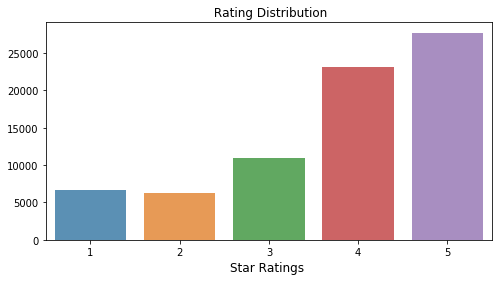

In [18]:
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title(" Rating Distribution")
plt.xlabel('Star Ratings ', fontsize=12)
plt.show()

### restaurant type###

In [19]:
restaurant_type=' '.join(dataset['restaurant_type'])
types=pd.DataFrame(restaurant_type.split(','),columns=['res_type'])
x=types.res_type.value_counts()
print("There are ",len(x)," different types of restaurants in Yelp!")

x = x.sort_values(ascending=False)
x = x.iloc[0:50]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("What are the top types?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)


There are  448  different types of restaurants in Yelp!


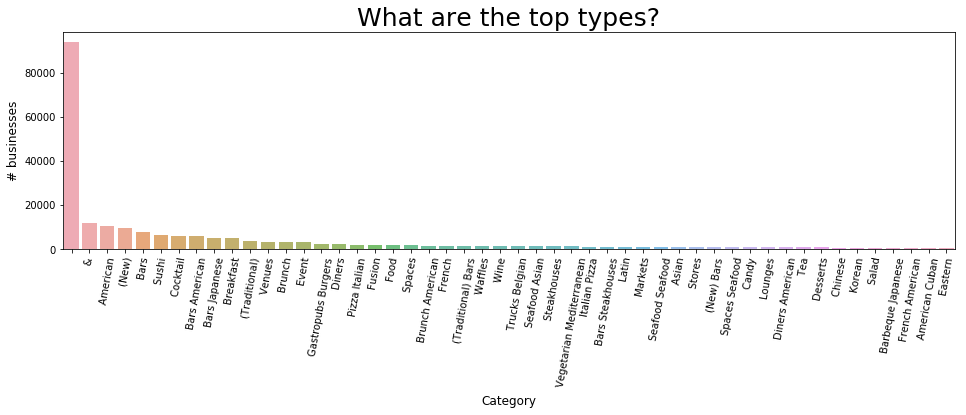

In [20]:
plt.show()

cause there are a lot of types, so i choose the top 50 types 

### total reviews ###

In [21]:
cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(dataset['user_text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

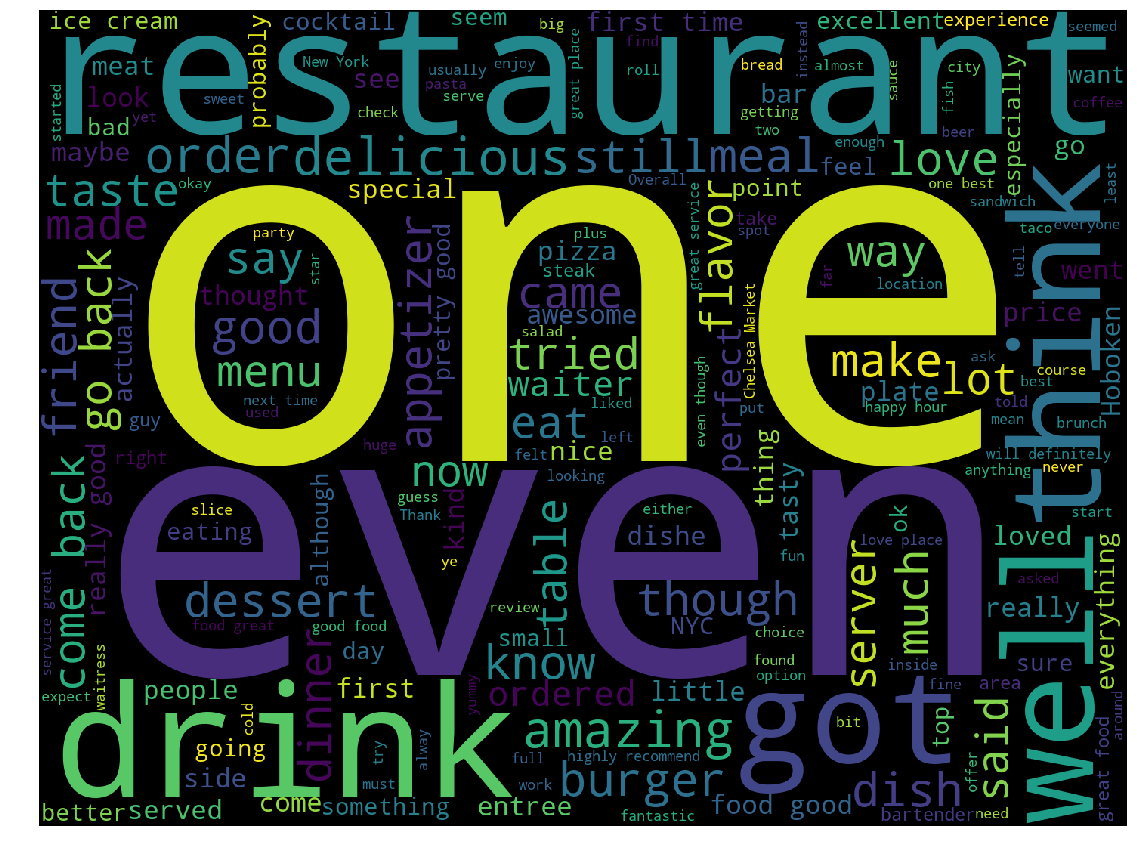

In [22]:
plt.show()

### Cause it is hard to see some meaingful words, so now i want to classifier the rating in 3 levels , to find each level feature###

In [166]:
rating_level = ['low', 'mid','high']
def new_level(y):
    if y<'3':
        return rating_level[0]
    
    if y=='3':
        return rating_level[1]
    if y>'3':
        return rating_level[2]
    
dataset['rating_level'] = dataset['user_rating'].apply(new_level)

dataset
        

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type,rating_level
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high
5,a5KJFFLBMoEpU7Bogn8YdQ,Nicole C.,4,beautifully decorated wine bar with delicious ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high
6,VG-EfMnPKHKHhEQZIWv1zQ,Kelly V.,3,"We were there today, for brunch. Very disappoi...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",mid
7,y_LETSyVwMVKbMSHwHDioQ,Erin A.,3,"I am feeling more 3 and 1/2 stars here, so let...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",mid
8,zbvdkxh9OWQtk8jQB1_4BA,Natasha D.,3,Ambience is nice but the dinner menu is limite...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",mid
9,ZZELut-m0rSyivf8saCMKA,Mark S.,4,It certainly wasn't easy...When the better hal...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high


In [131]:
x=dataset['rating_level'].value_counts()
x=x.sort_index()

In [132]:
x

high    50842
low     12853
mid     10916
Name: rating_level, dtype: int64

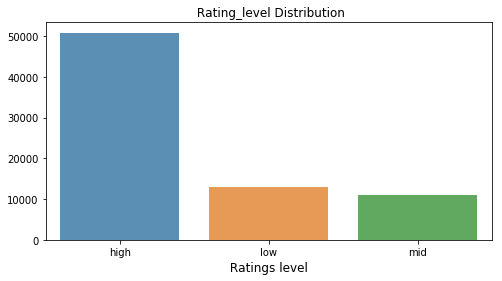

In [133]:
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title(" Rating_level Distribution")
plt.xlabel(' Ratings level ', fontsize=12)
plt.show()

In [27]:
clean_review = []
for i in range(0, 74611):
    review = re.sub('[^a-zA-Z]', ' ', dataset['user_text'][i])

    review = review.lower()

    review = review.split()

    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = [word for word in review if not word in ['place','resturant','one','get','food','drink','table','order','restuar','tabl','go','said','tri','frined','realli','dish','tast','come','ask','even']]
    review = ' '.join(review)
    clean_review.append(review) 

In [28]:
clean_review

['book grand vin brunch locat celebr wed day could happier group guest abl reserv back dine room everyth restaur star decor immacul choic love french onion burger avocado toast egg benedict biggest hit everyth ran smoothli without hitch howev star day event director ann mari begin convers last minut chang ann mari blew us away meticul minut detail nearli great time definit bring busi back grand vin',
 'sooooo date night turn pick random restaur yelp select base review menu item decor area well walk low lit romant feel bar crow bar bartend direct us hidden seat far left side mmmm perfectli fine diner room pack friday night around clock believ anyway settl eye drawn cocktail absolut love bartend told us special bacon wrap filet sort sold date got seafood ravioli delici share calamari app start oh meal came mid way done calamari runner hear us say want wrap next time past us mention calamari cours without make big deal apolog fast forward end meal took last sip round three cocktail runner

In [167]:
dataset['cleaned_review']=clean_review

In [168]:
dataset

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type,rating_level,cleaned_review
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,book grand vin brunch locat celebr wed day cou...
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,sooooo date night turn pick random restaur yel...
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,ador littl wine bar outdoor seat avail wine ta...
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,top restaur hoboken well made pleasant atmosph...
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,great space servic point short rib risotto cha...
5,a5KJFFLBMoEpU7Bogn8YdQ,Nicole C.,4,beautifully decorated wine bar with delicious ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,beauti decor wine bar delici servic mediocr ex...
6,VG-EfMnPKHKHhEQZIWv1zQ,Kelly V.,3,"We were there today, for brunch. Very disappoi...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",mid,today brunch disappoint mean aw expect someth ...
7,y_LETSyVwMVKbMSHwHDioQ,Erin A.,3,"I am feeling more 3 and 1/2 stars here, so let...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",mid,feel star let imagin far away popular hoboken ...
8,zbvdkxh9OWQtk8jQB1_4BA,Natasha D.,3,Ambience is nice but the dinner menu is limite...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",mid,ambienc nice dinner menu limit alright noth or...
9,ZZELut-m0rSyivf8saCMKA,Mark S.,4,It certainly wasn't easy...When the better hal...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars",high,certainli easi better half offer take dinner a...


In [68]:
high_level = dataset[dataset['rating_level'] == 'high']


high level


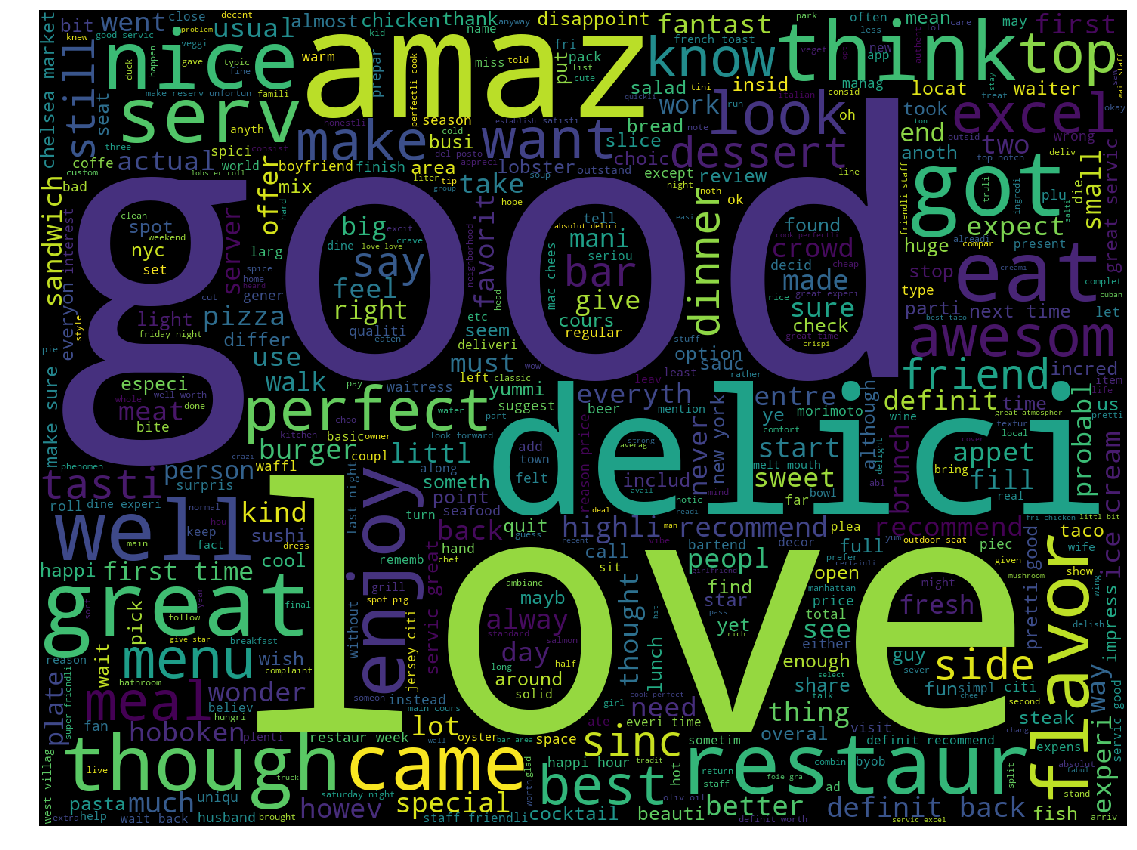

In [69]:
print('high level')
cloud = WordCloud(width=1440, height= 1080,max_words= 500).generate(' '.join(high_level['cleaned_review'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [33]:
mid_level = dataset[dataset['rating_level'] == 'mid']

mid level


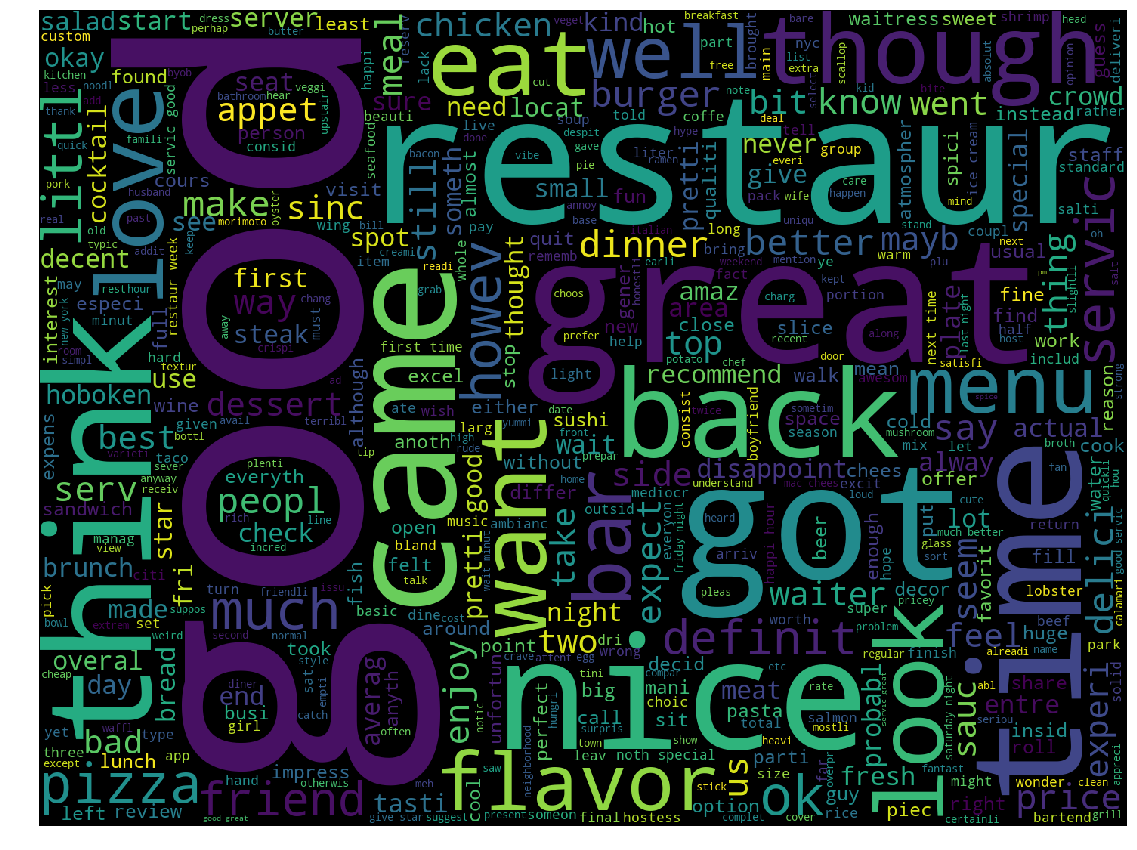

In [34]:
print('mid level')
cloud = WordCloud(width=1440, height= 1080,max_words= 500).generate(' '.join(mid_level['cleaned_review'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [35]:
low_level = dataset[dataset['rating_level'] == 'low']

low level


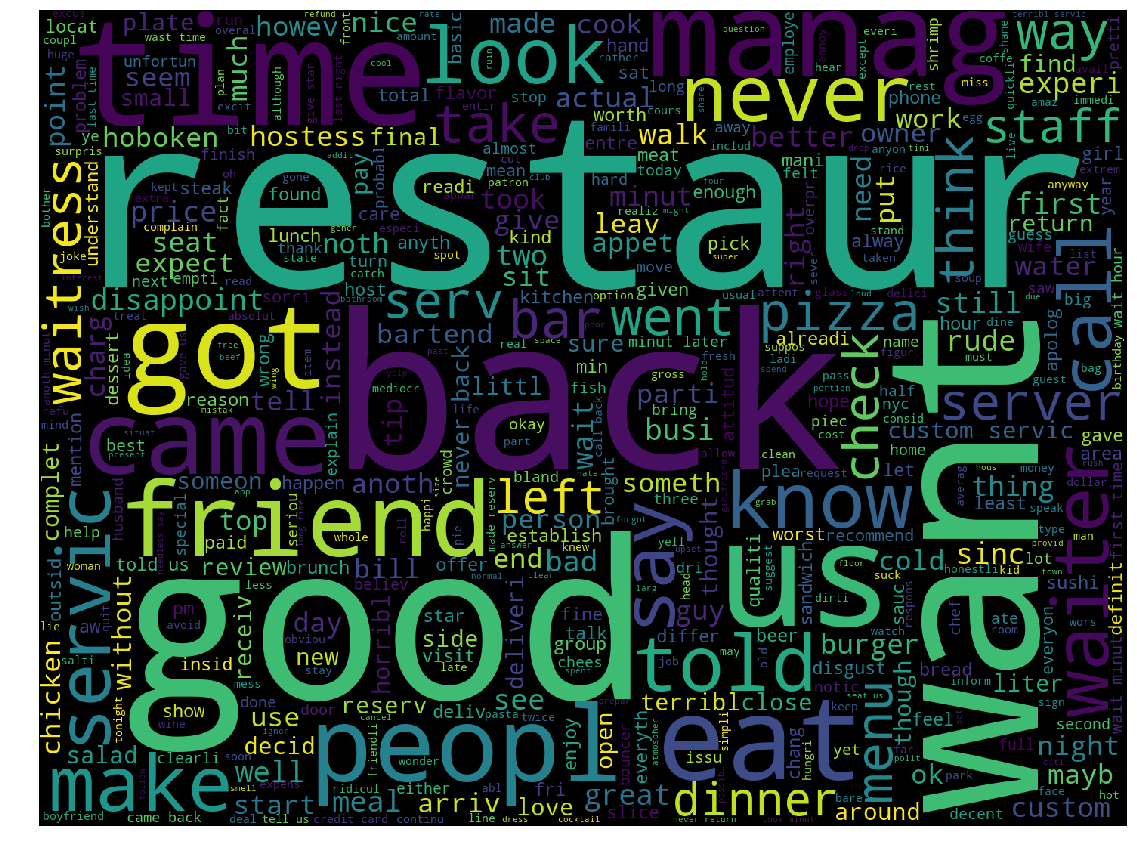

In [36]:
print('low level')
cloud = WordCloud(width=1440, height= 1080,max_words= 500).generate(' '.join(low_level['cleaned_review'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

###  user ###

In [70]:
len(dataset.user_name.unique())

24781

In [71]:
len(dataset.user_id.unique())

44949

In [39]:
user_name = pd.DataFrame(dataset.user_name.value_counts().head(20))
user_name.reset_index(level=0, inplace = True)
user_name.columns = ['name','count']
user_name

,name,count
0,Nicholas G.,103
1,David S.,91
2,David C.,87
3,John M.,80
4,Jessica W.,79
5,Alison C.,78
6,Melissa M.,77
7,Dave F.,73
8,Alex C.,71
9,Nicole S.,70


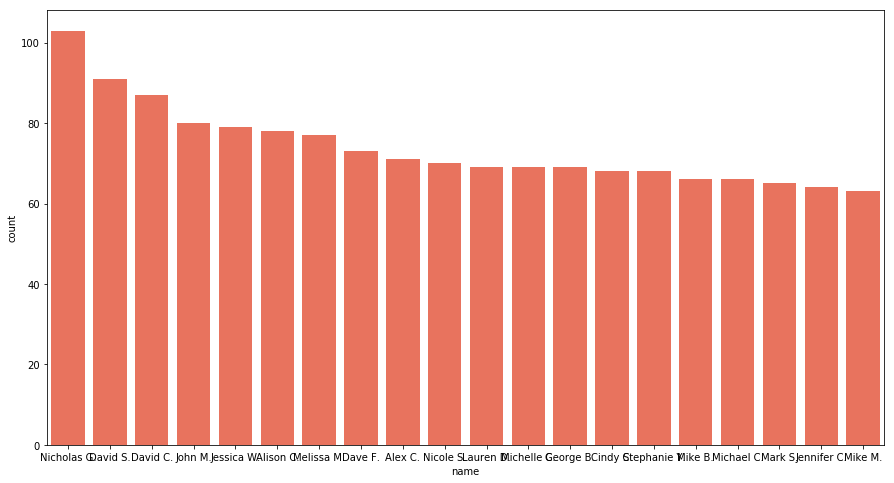

In [40]:
f,ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="name", y="count", data=user_name, color="tomato",ax = ax)
plt.show()

In [41]:
user_id = pd.DataFrame(dataset.user_id.value_counts().head(10))
user_id.reset_index(level=0, inplace = True)
user_id.columns = ['id','count']
user_id

,id,count
0,QxTNaHoxTL8f7jAK5nwQ1g,101
1,5aZX8bTiD0k9vR60SG588Q,76
2,GRY2acZtI5q4P1KdCWhcUQ,66
3,LcWOq7p7Mhtv9hIlDrhy9A,62
4,Y59HQNazSLR1EUMUmMOaFg,61
5,NWLqOKl0Vxi7qK-6EoBLbg,60
6,A5dqSwriUs8cV4DEzS_V9A,59
7,svFycHjXZYpNVutZ_0_gDQ,59
8,dl4ENy4Bk6-lCu59A8vxbg,57
9,94V-snVUg2Gd-OPd7rcZEg,54


#### let us find price with rating relationship ###

In [171]:

#dataset['restaurant_price']=[i.replace('', '$$') for i in dataset['restaurant_price']]
    

In [176]:
for i in range(len(dataset)):
    if dataset.iloc[i,6:7].isnull().any() == True:
        dataset.iloc[i,6] = '$$'

In [177]:
dataset

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5.0 star rating,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4.0 star rating,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5.0 star rating,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4.0 star rating,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5.0 star rating,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
5,a5KJFFLBMoEpU7Bogn8YdQ,Nicole C.,4.0 star rating,beautifully decorated wine bar with delicious ...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
6,VG-EfMnPKHKHhEQZIWv1zQ,Kelly V.,3.0 star rating,"We were there today, for brunch. Very disappoi...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
7,y_LETSyVwMVKbMSHwHDioQ,Erin A.,3.0 star rating,"I am feeling more 3 and 1/2 stars here, so let...",Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
8,zbvdkxh9OWQtk8jQB1_4BA,Natasha D.,3.0 star rating,Ambience is nice but the dinner menu is limite...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"
9,ZZELut-m0rSyivf8saCMKA,Mark S.,4.0 star rating,It certainly wasn't easy...When the better hal...,Grand Vin,4.0 star rating,$$,"Wine, Bars,, Italian,, Cocktail, Bars"


In [178]:
dataset.isnull().sum()

user_id              0
user_name            0
user_rating          0
user_text            0
restaurant_name      0
restaurant_rating    0
restaurant_price     0
restaurant_type      0
dtype: int64

In [179]:
def new_price(i):
    if i=='$':
        return 1
    elif i=='$$':
        return 2
    elif i=='$$$':
        return 3
    elif i=='$$$$':
        return 4

    
    
dataset['restaurant_price'] = dataset['restaurant_price'].apply(new_price)

dataset
        

,user_id,user_name,user_rating,user_text,restaurant_name,restaurant_rating,restaurant_price,restaurant_type
0,dRuCO4NYO7zyAF8-CeJmZg,Jason L.,5.0 star rating,We booked Grand Vin as our brunch location to ...,Grand Vin,4.0 star rating,2,"Wine, Bars,, Italian,, Cocktail, Bars"
1,f36YZ1cA291bNtMHXWtu1Q,Danyale W.,4.0 star rating,Sooooo for date night it was his turn to pick ...,Grand Vin,4.0 star rating,2,"Wine, Bars,, Italian,, Cocktail, Bars"
2,-xYUKfWQTaB-7BeizsQA3w,Robin G.,5.0 star rating,Adorable little wine bar with outdoor seating ...,Grand Vin,4.0 star rating,2,"Wine, Bars,, Italian,, Cocktail, Bars"
3,tt1vLgAP5UpRXAKJLT2KWg,Alec K.,4.0 star rating,One of the top restaurants in Hoboken. Well ma...,Grand Vin,4.0 star rating,2,"Wine, Bars,, Italian,, Cocktail, Bars"
4,-K79Xep4lElqIChsJYWuiQ,Robbie O.,5.0 star rating,Great space- service is on point - short rib ...,Grand Vin,4.0 star rating,2,"Wine, Bars,, Italian,, Cocktail, Bars"
5,a5KJFFLBMoEpU7Bogn8YdQ,Nicole C.,4.0 star rating,beautifully decorated wine bar with delicious ...,Grand Vin,4.0 star rating,2,"Wine, Bars,, Italian,, Cocktail, Bars"
6,VG-EfMnPKHKHhEQZIWv1zQ,Kelly V.,3.0 star rating,"We were there today, for brunch. Very disappoi...",Grand Vin,4.0 star rating,2,"Wine, Bars,, Italian,, Cocktail, Bars"
7,y_LETSyVwMVKbMSHwHDioQ,Erin A.,3.0 star rating,"I am feeling more 3 and 1/2 stars here, so let...",Grand Vin,4.0 star rating,2,"Wine, Bars,, Italian,, Cocktail, Bars"
8,zbvdkxh9OWQtk8jQB1_4BA,Natasha D.,3.0 star rating,Ambience is nice but the dinner menu is limite...,Grand Vin,4.0 star rating,2,"Wine, Bars,, Italian,, Cocktail, Bars"
9,ZZELut-m0rSyivf8saCMKA,Mark S.,4.0 star rating,It certainly wasn't easy...When the better hal...,Grand Vin,4.0 star rating,2,"Wine, Bars,, Italian,, Cocktail, Bars"


In [180]:
dataset.isnull().sum()

user_id              0
user_name            0
user_rating          0
user_text            0
restaurant_name      0
restaurant_rating    0
restaurant_price     0
restaurant_type      0
dtype: int64

In [185]:
price = pd.DataFrame(dataset.restaurant_price.value_counts().head(20))
price.reset_index(level=0, inplace = True)
price.columns = ['dollar','count']
price

,dollar,count
0,2,38455
1,3,19809
2,1,10567
3,4,5780


In [190]:
f,ax = plt.subplots(figsize=(4, 4))

sns.barplot(x="dollar", y="count", data=price, color="tomato",ax = ax)


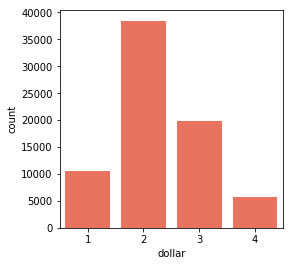

In [191]:
plt.show()